# Introductoin to SciKit-Learn
From Jake VDP: https://github.com/jakevdp/sklearn_pycon2014

and less from https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/
    

In [1]:
# check versions

import numpy as np
print('numpy: {}'.format(np.__version__))

import scipy as sp
print('scipy: {}'.format(sp.__version__))

import matplotlib as mpl
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(mpl.__version__))

import sklearn as sklearn
print('scikig-learn: {}'.format(sklearn.__version__))

%matplotlib inline

numpy: 1.20.1
scipy: 1.6.2
matplotlib: 3.3.4
scikig-learn: 0.24.1


In [4]:
#sparse matrices

X = np.random.random((10,5))
print(X)

[[0.76300088 0.70931823 0.20098308 0.93411411 0.84600565]
 [0.49472861 0.7329668  0.59467286 0.57216703 0.01547246]
 [0.67183961 0.41073912 0.59521281 0.12145553 0.79008423]
 [0.73964588 0.4917797  0.85001004 0.65924458 0.42646535]
 [0.13112679 0.92727165 0.04980201 0.79777005 0.34104162]
 [0.95657209 0.34559682 0.11261417 0.26602201 0.0620053 ]
 [0.3002196  0.16185192 0.5974427  0.18228031 0.81855726]
 [0.03491059 0.64527763 0.500431   0.16922747 0.8786844 ]
 [0.87004001 0.90867248 0.77405345 0.0962078  0.29422873]
 [0.46633316 0.31250738 0.80637242 0.46560958 0.96295424]]


In [5]:
X[X < 0.7] = 0
print(X)

[[0.76300088 0.70931823 0.         0.93411411 0.84600565]
 [0.         0.7329668  0.         0.         0.        ]
 [0.         0.         0.         0.         0.79008423]
 [0.73964588 0.         0.85001004 0.         0.        ]
 [0.         0.92727165 0.         0.79777005 0.        ]
 [0.95657209 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.81855726]
 [0.         0.         0.         0.         0.8786844 ]
 [0.87004001 0.90867248 0.77405345 0.         0.        ]
 [0.         0.         0.80637242 0.         0.96295424]]


In [6]:
from scipy import sparse

In [7]:
#turn X into a compressed-sparse-row matrix
X_csr = sparse.csr_matrix(X)
print(X_csr)

  (0, 0)	0.7630008785542964
  (0, 1)	0.7093182318722095
  (0, 3)	0.9341141067804545
  (0, 4)	0.8460056525858226
  (1, 1)	0.7329667970131003
  (2, 4)	0.7900842342226801
  (3, 0)	0.7396458807165548
  (3, 2)	0.8500100440105494
  (4, 1)	0.9272716526266792
  (4, 3)	0.7977700467862333
  (5, 0)	0.9565720874858679
  (6, 4)	0.8185572621932147
  (7, 4)	0.878684401613297
  (8, 0)	0.8700400137818995
  (8, 1)	0.9086724789281608
  (8, 2)	0.7740534504399224
  (9, 2)	0.8063724174030185
  (9, 4)	0.9629542427696843


# Iris dataset

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()

In [10]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
n_samples, n_features = iris.data.shape
print (n_samples, n_features)
print(iris.data[0])

150 4
[5.1 3.5 1.4 0.2]


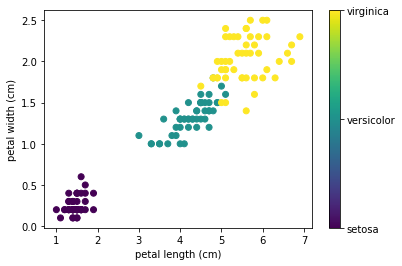

In [13]:
def plot_iris_projection(x_index,y_index):
    #this formatter will label the colorbar with the correct target names
    formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
    
    plt.scatter(iris.data[:,x_index], iris.data[:,y_index],
               c = iris.target)
    plt.colorbar(ticks = [0,1,2], format = formatter)
    plt.xlabel(iris.feature_names[x_index])
    plt.ylabel(iris.feature_names[y_index])
    
plot_iris_projection(2,3)
               
               

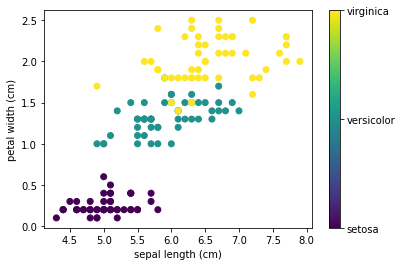

In [22]:
# exercise: find combination of x and y 
#that maximally separate the three classes

plot_iris_projection(0,3)

# load digits dataset

In [23]:
from sklearn.datasets import load_digits
digits = load_digits()

In [24]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [25]:
n_samples, n_features = digits.data.shape
print(n_samples, n_features)

1797 64


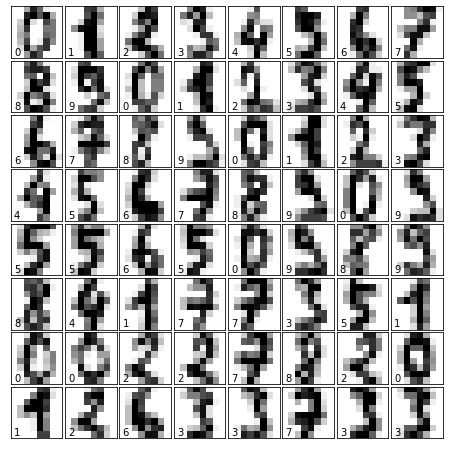

In [28]:
# visualize the data set

#set up the figure
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)

#plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    
    #label the image with the target value
    ax.text(0,7,str(digits.target[i]))

# S curve data

In [30]:
from sklearn.datasets import make_s_curve
data, colors = make_s_curve(n_samples = 2000)
print(data.shape)
print(colors.shape)

(2000, 3)
(2000,)


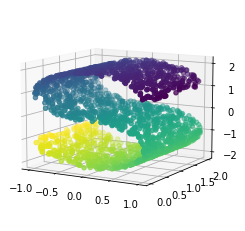

In [31]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c = colors)
ax.view_init(10,-60)

# Exercise: faces dataset

In [32]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/josh.fuchs/scikit_learn_data


In [33]:
n_samples, n_features = faces.data.shape
print (n_samples, n_features)

400 4096


In [35]:
print(faces.images.shape)

(400, 64, 64)


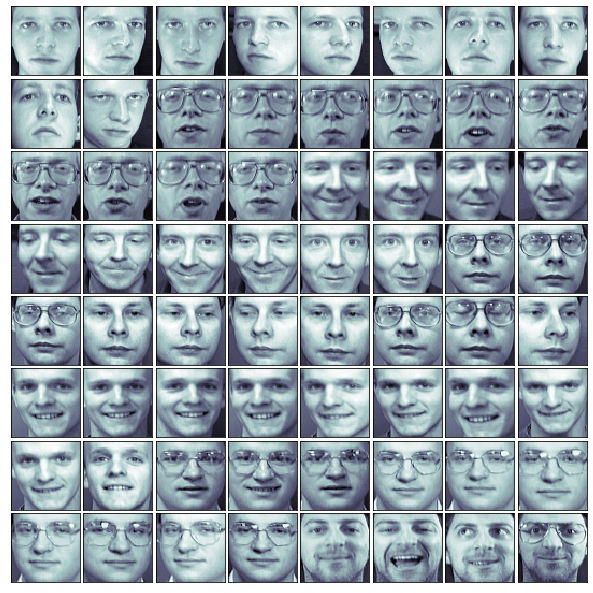

In [40]:
# set up the figure
fig = plt.figure(figsize=(8, 8))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone, interpolation='nearest')
    


# Lesson 3: Basic Principles of Machine Learning

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
model = LinearRegression(normalize=True)
print(model.normalize)

True


In [4]:
print(model)

LinearRegression(normalize=True)


In [5]:
x = np.array([0,1,2])
y = np.array([0,2,4])

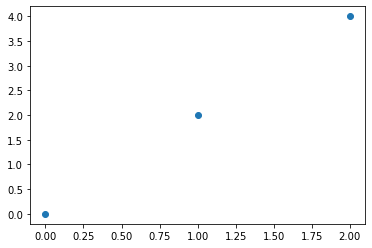

In [6]:
plt.plot(x,y,'o')

In [10]:
X = x[:, np.newaxis] #the input data for sklearn is 2D: (samples == 3 x features == 1)
print(x)
print(X)

[0 1 2]
[[0]
 [1]
 [2]]


In [11]:
model.fit(X,y)
model.coef_

array([2.])

In [13]:
# Classification testing
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)

#What kind of iris has 3cm x 5 cm sepal and 4cm x 2 cm petal?
print(iris.target_names[knn.predict([[3,5,4,2]])])

['virginica']


In [14]:
# exercise
from sklearn.svm import SVC
unknown_iris = [[3,5,4,2]]

In [17]:
svc = SVC(gamma='auto')
svc.fit(X,y)

SVC(gamma='auto')

In [18]:
print(iris.target_names[svc.predict(unknown_iris)])

['virginica']


## Regression

In [21]:
# create some simple data
np.random.seed(0)
X = np.random.random(size=(20,1))
y = 3. * X.squeeze() + 2. + np.random.normal(size=20)

In [24]:
# fit a linear regression to it
model = LinearRegression(fit_intercept=True)
model.fit(X,y)
print('Model coefficient: %.5f, and intercept: %.5f' % (model.coef_, model.intercept_))

Model coefficient: 3.93491, and intercept: 1.46229


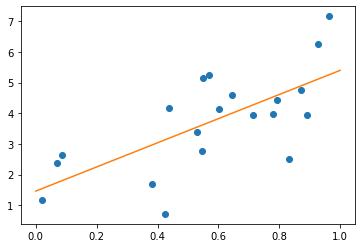

In [27]:
# plot the data and the model prediction
X_test = np.linspace(0,1,100)[:, np.newaxis]
y_test = model.predict(X_test)
plt.plot(X.squeeze(), y, 'o')
plt.plot(X_test.squeeze(), y_test)

## dimensionality reduction

In [28]:
from sklearn.decomposition import PCA

In [29]:
X, y = iris.data, iris.target
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print('Reduced dataset shape: ', X_reduced.shape)

Reduced dataset shape:  (150, 2)


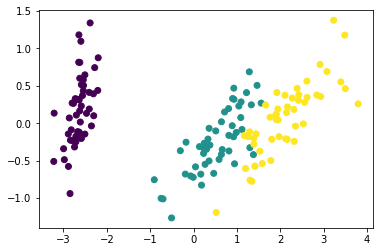

In [30]:
plt.scatter(X_reduced[:,0], X_reduced[:, 1], c = y)

In [32]:
print('Meaning of the 2 components:')
for component in pca.components_:
    print(" + ".join("%.2f x %s" % (value, name)
                    for value, name in zip(component, iris.feature_names)))

Meaning of the 2 components:
0.36 x sepal length (cm) + -0.08 x sepal width (cm) + 0.86 x petal length (cm) + 0.36 x petal width (cm)
0.66 x sepal length (cm) + 0.73 x sepal width (cm) + -0.17 x petal length (cm) + -0.08 x petal width (cm)


## Clustering

In [33]:
from sklearn.cluster import KMeans

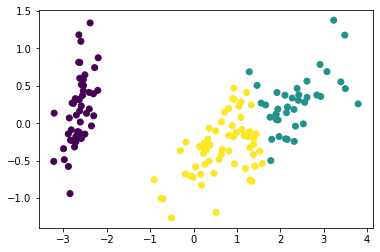

In [37]:
k_means = KMeans(n_clusters = 3, random_state = 0)
k_means.fit(X_reduced)
y_pred = k_means.predict(X_reduced)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred)


# Measuring Performance

In [39]:
X, y = iris.data, iris.target
clf = neighbors.KNeighborsClassifier(n_neighbors = 1)
clf.fit(X, y)
y_pred = clf.predict(X)

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
print(confusion_matrix(y,y_pred))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


In [43]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(confusion_matrix(ytest,ypred))

[[12  0  0]
 [ 0 11  3]
 [ 0  0 12]]
